In [145]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [146]:
import pandas as pd

In [147]:
predictions = pd.read_table('final_predictions(1).txt')

In [148]:
phenotypes = pd.read_table('pheno_emaize.txt')
pedigree = phenotypes['pedigree'].str.split('_', expand=True)
pedigree.columns = ['f', 'X', 'm']
phenotypes = pd.concat([phenotypes, pedigree], axis=1)
phenotypes['number'] = np.arange(phenotypes.shape[0])
parent_table = phenotypes.pivot_table(values='number', index=['m'], columns=['f'], dropna=False)
male_ids = ['m%d' % i for i in range(1, parent_table.shape[0] + 1)]
female_ids = ['f%d' % i for i in range(1, parent_table.shape[1] + 1)]
parent_table = parent_table.loc[male_ids, female_ids]

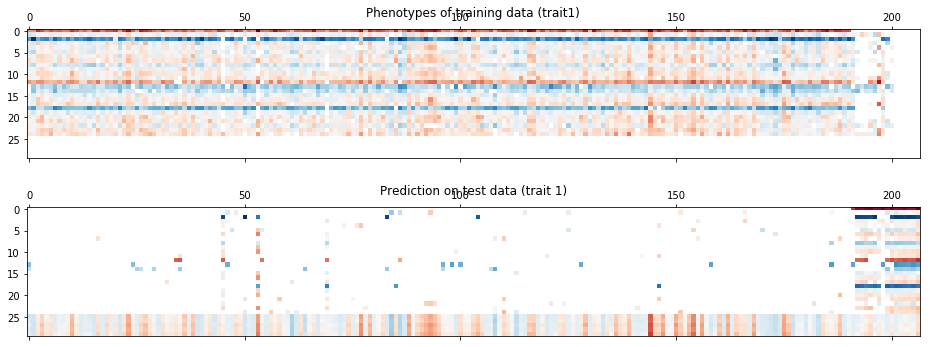

In [180]:
fig, ax = subplots(2, 1, figsize=(16, 6))
ax[0].matshow(np.take(np.ravel(phenotypes['trait1'].values), parent_table), cmap='RdBu')
ax[0].set_title('Phenotypes of training data (trait1)')

trait1_pred = np.full(phenotypes.shape[0], np.nan)
trait1_pred[predictions['number'].tolist()] = predictions['trait1'].values
ax[1].matshow(np.take(trait1_pred, parent_table), cmap='RdBu')
ax[1].set_title('Prediction on test data (trait 1)')

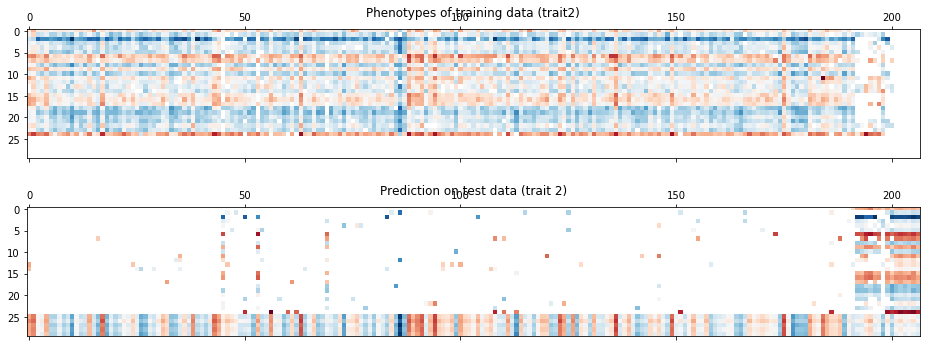

In [181]:
fig, ax = subplots(2, 1, figsize=(16, 6))
ax[0].matshow(np.take(np.ravel(phenotypes['trait2'].values), parent_table), cmap=cm.RdBu)
ax[0].set_title('Phenotypes of training data (trait2)')

trait2_pred = np.full(phenotypes.shape[0], np.nan)
trait2_pred[predictions['number'].tolist()] = predictions['trait2'].values
ax[1].matshow(np.take(trait2_pred, parent_table), cmap=cm.RdBu)
ax[1].set_title('Prediction on test data (trait 2)')

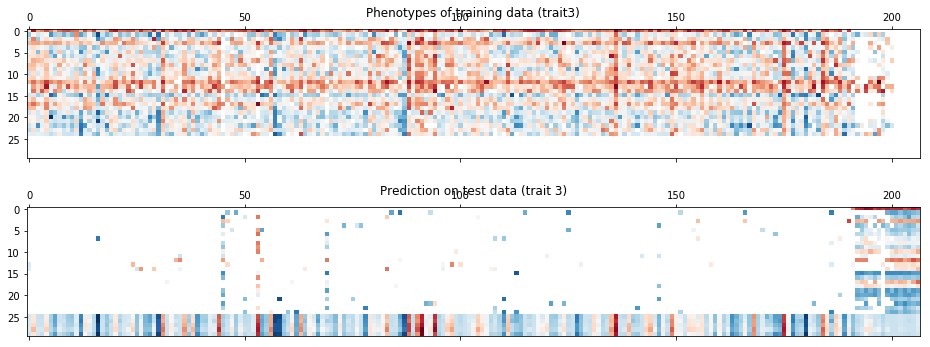

In [182]:
fig, ax = subplots(2, 1, figsize=(16, 6))
ax[0].matshow(np.take(np.ravel(phenotypes['trait3'].values), parent_table), cmap=cm.RdBu)
ax[0].set_title('Phenotypes of training data (trait3)')

trait3_pred = np.full(phenotypes.shape[0], np.nan)
trait3_pred[predictions['number'].tolist()] = predictions['trait3'].values
ax[1].matshow(np.take(trait3_pred, parent_table), cmap=cm.RdBu)
ax[1].set_title('Prediction on test data (trait 3)')